Лабораторная 21 Фазылова Алика

# 1.HOG


In [ ]:
pip install scikit-image

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure, io

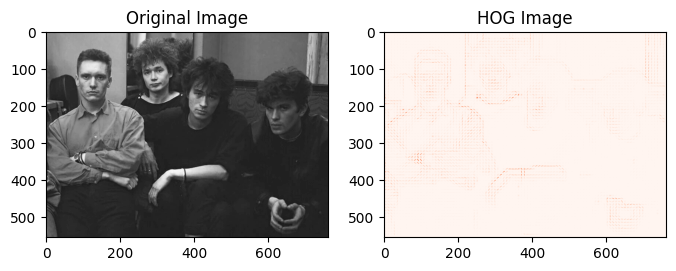

In [ ]:
# Загрузка изображения
image_path = '/content/Kino.jpg'
image = io.imread(image_path, as_gray=True)

# Вычисление HOG-признаков
hog_features, hog_image = hog(image, visualize=True)

# Нормализация и улучшение контраста HOG-изображения
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Отображение исходного изображения и HOG-изображения
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap=plt.cm.Reds)
plt.title('HOG Image')
plt.show()

# 2.Face landmarks


In [ ]:
pip install dlib opencv-python

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2024-08-05 00:20:05--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.9MB/s    in 4.5s    

2024-08-05 00:20:10 (13.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
import dlib
import cv2
import matplotlib.pyplot as plt

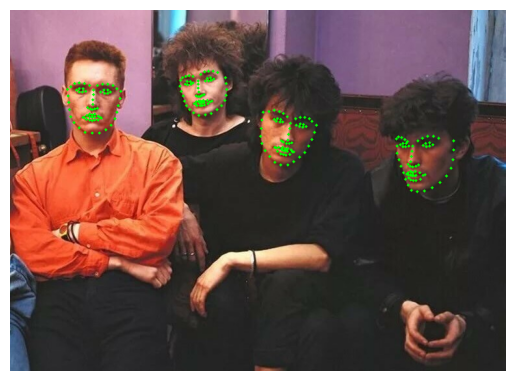

In [ ]:
# Загрузка изображения с лицом
image_path = '/content/Kino.jpg'
image = cv2.imread(image_path)

# Инициализация детектора лиц и предварительно обученной модели
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

# Преобразование изображения в черно-белое
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Обнаружение лиц на изображении
faces = detector(gray)

# Отображение точек лица
for face in faces:
    landmarks = predictor(gray, face)
    for point in landmarks.parts():
        cv2.circle(image, (point.x, point.y), 2, (0, 255, 0), -1)

# Отображение изображения с точками лица
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# 3.Embeddings

In [ ]:
pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=4d93ae7354ff0714e5842deb93fa2c5bb00580d433d07dc8d59185191eb7311e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Загрузка изображения
image_path = '/content/Kino.jpg'
image = cv2.imread(image_path)

# Конвертация изображения в RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Обнаружение лиц на изображении
face_locations = face_recognition.face_locations(rgb_image)

# Извлечение эмбеддингов лиц
face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

# Печать эмбеддингов для каждого обнаруженного лица
for i, face_encoding in enumerate(face_encodings):
    print(f"Эмбеддинг лица {i + 1}:")
    print(face_encoding)


Эмбеддинг лица 1:
[-0.15558326  0.12776271  0.01272512 -0.11934713 -0.0571589   0.02752618
 -0.06759501 -0.06974161  0.16138822 -0.09321049  0.26005203  0.03547283
 -0.29052699 -0.08861937  0.00468989  0.16130479 -0.22139217 -0.20748097
 -0.12153876 -0.06610194  0.0720132   0.10286132 -0.09710386  0.00860669
 -0.09940276 -0.25251797 -0.02194452 -0.03507626  0.02304653 -0.10551138
  0.05084259  0.0356108  -0.16700444 -0.03219584  0.0891965   0.10432204
 -0.06557991 -0.04333974  0.25643265  0.03723862 -0.16217354 -0.06203878
  0.0981637   0.26775408  0.17029333  0.01847501 -0.03728012 -0.04231125
  0.13024233 -0.33917791  0.10847311  0.21074814  0.17348132  0.16930179
  0.09560567 -0.22985664  0.03322515  0.17957686 -0.16294001  0.09923002
  0.04708521 -0.21175903 -0.03801794 -0.03861127  0.16740689  0.0419466
 -0.11571874 -0.19922718  0.18013422 -0.06002786 -0.1956557   0.11315069
 -0.0964276  -0.16994305 -0.33458561  0.03657745  0.36162055  0.17003304
 -0.23901331  0.01631513 -0.006453

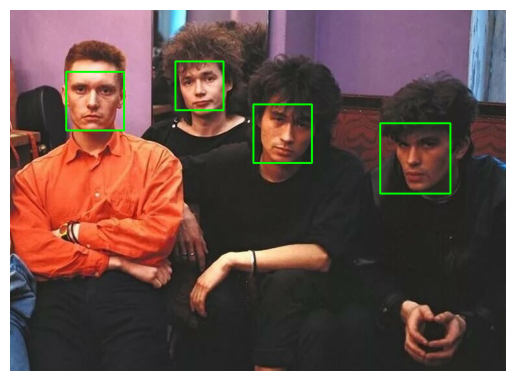

In [ ]:
# Обводка лиц прямоугольниками
for (top, right, bottom, left) in face_locations:
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

# Отображение изображения с обведенными лицами
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 4.MTCNN

In [ ]:
pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.7 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step


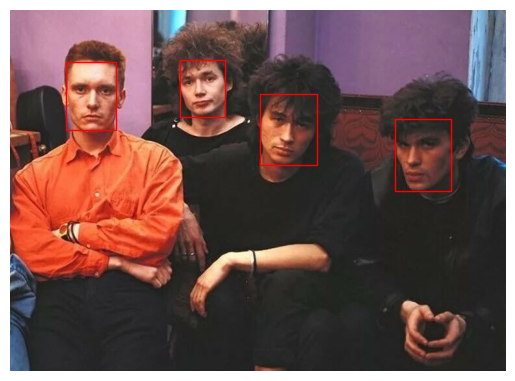

In [ ]:
# Загрузка изображения
image_path = '/content/Kino.jpg'
pixels = plt.imread(image_path)

# Создание детектора MTCNN
detector = MTCNN()

# Обнаружение лиц на изображении
faces = detector.detect_faces(pixels)

# Отображение изображения с обведенными лицами
plt.imshow(pixels)
ax = plt.gca()

# Отображение каждого лица
for face in faces:
    x, y, width, height = face['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

plt.axis('off')
plt.show()
